In [8]:
import os
import sys

import numpy as np
import time
import pickle
from pprint import pprint
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel
from pyHalo.preset_models import CDM
from hydra import initialize, compose
from pyHalo.Cosmology.cosmology import Cosmology
import astropy.cosmology as astropy_cosmo
import traceback

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import diagnostic_plot, plot
from mejiro.lenses.lens import Lens
from mejiro.lenses.test import TestLens
from mejiro.helpers import pyhalo
from mejiro.utils import util

np.random.seed(config.seed)

In [9]:
lens = TestLens()

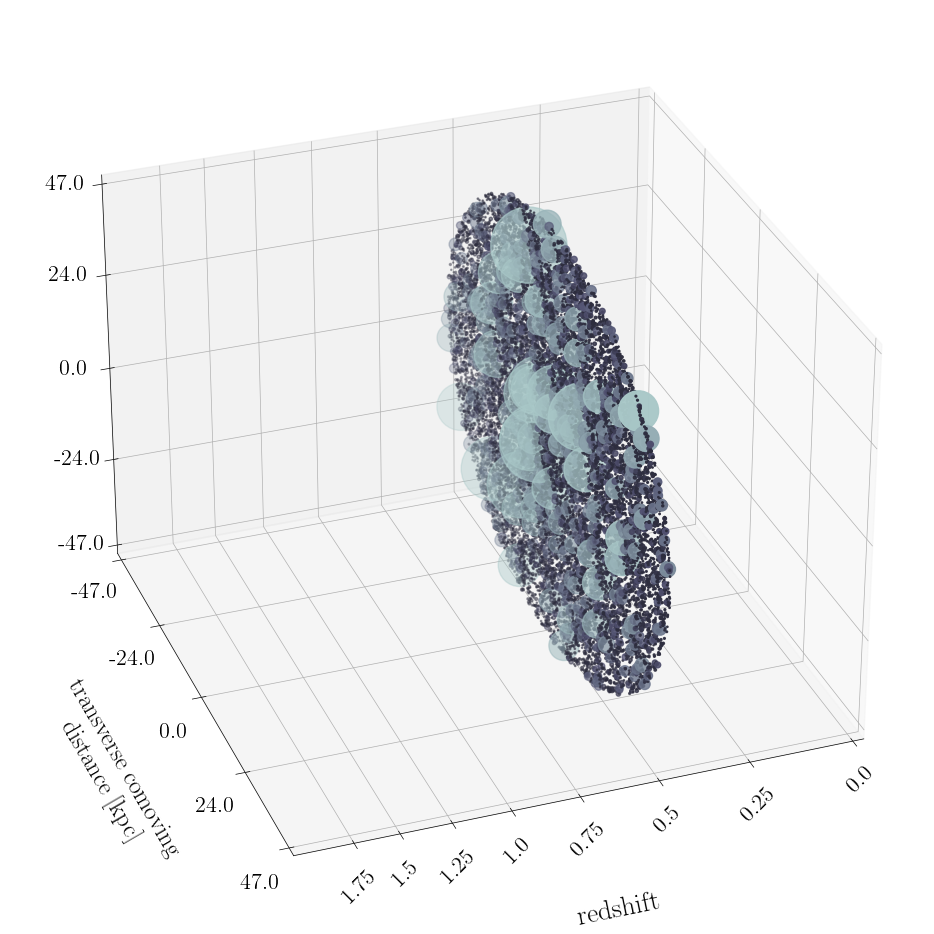

In [10]:
realizationCDM = CDM(z_lens=0.5, z_source=2., cone_opening_angle_arcsec=11, LOS_normalization=0.0)

fig = plt.figure(2)
fig.set_size_inches(14,12)
ax = plt.subplot(111, projection='3d')
realizationCDM.plot(ax)

In [11]:
lens_dict = {}
for band in util.hydra_to_dict(config.pipeline)['band']:
    # open pickled lens list
    lens_list = util.unpickle(os.path.join(pickle_dir, f'01_skypy_output_lens_list_{band.lower()}'))
    lens_dict[band] = lens_list

In [13]:
for lens in lens_list:
    print(round(lens.z_source, 2), round(lens.z_lens, 2))

1.28 0.83
0.42 0.3
1.45 0.58
0.89 0.35
1.23 0.37
1.03 0.3
0.91 0.23
1.44 0.23
0.82 0.49
0.62 0.29
1.94 0.45
0.66 0.46
1.15 0.74
0.83 0.61
1.1 0.39
0.8 0.5
0.44 0.3
1.23 0.52
0.5 0.34
1.06 0.55
0.91 0.42
0.9 0.37
1.25 0.42
1.37 0.42
1.41 0.44
1.47 0.71
1.67 0.23
1.4 0.45
1.58 0.6
1.0 0.41
1.21 0.43
1.46 0.52
1.54 0.32
1.76 0.46
1.35 0.3
0.86 0.39
1.58 0.39
0.73 0.28
0.53 0.21
0.81 0.21
2.86 0.8
1.03 0.26
1.08 0.26
1.46 0.96
1.44 0.71
1.63 0.53
0.91 0.49
2.96 0.35
0.63 0.34
1.43 0.28
0.79 0.34
0.8 0.36
0.86 0.46
0.94 0.29
1.02 0.43
0.87 0.52
1.14 0.23
1.32 0.24
1.22 0.64
1.06 0.3
0.44 0.23
1.4 0.72
0.86 0.34
1.26 0.26
1.36 0.48
1.29 0.35
0.74 0.35
0.81 0.26
0.55 0.28
1.0 0.22
1.76 0.61
0.77 0.55
1.25 0.36
2.12 0.36
0.81 0.26
0.51 0.27
1.34 0.45
0.99 0.72
1.25 0.63
1.7 0.35
0.49 0.31
1.32 0.22
1.25 0.51
1.38 0.49
1.26 0.26
0.55 0.33
1.15 0.51
0.59 0.2
0.8 0.53
1.44 0.27
1.35 0.72
0.82 0.31
0.98 0.28
0.63 0.34
1.89 0.45
1.67 0.7
1.13 0.28
0.91 0.38
1.06 0.55
1.14 0.29
0.91 0.41
0.61 0.26
0

In [15]:
for lens in tqdm(lens_list[:30]):
    rounded_z_source = round(lens.z_source, 2)
    rounded_z_lens = round(lens.z_lens, 2)
    lens.add_subhalos(*pyhalo.generate_CDM_halos(z_lens=rounded_z_lens, z_source=rounded_z_source, cone_opening_angle_arcsec=11., LOS_normalization=0.))

100%|██████████| 30/30 [07:24<00:00, 14.83s/it]
